In [9]:
import os
import random
import shutil

from paths import src_dir

In [10]:
def add_suffix_to_path(path, suffix): 
    # Check if the path already ends with a slash
    if path.endswith('/'):
        new_path = path.rstrip('/') + suffix + '/'
    else:
        new_path = path + suffix + '/'
    return new_path

In [11]:
def random_split(parent_dir, ratio_train=0.8):
    """
    Randomly separate subdirectories within a parent directory and move them to
    separate output directories according to the given ratios.

    Parameters:
    - parent_dir: The parent directory containing subdirectories to be split.
    - ratios: A list of ratios (e.g., [0.7, 0.3]) specifying the split ratio.
    - output_dirs: A list of output directory names for the separated data.

    Returns:
    - None
    """
    # define the suffixes of the different data chunks
    suffixes = ["_train", "_validate"]

    # adding suffixes to form output directories
    output_dirs = [add_suffix_to_path(parent_dir, suffix) for suffix in suffixes]

    # count the subdirectories that will be moved
    subdirectories = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

    # Create output directories if they don't exist
    for output_dir in output_dirs:
        os.makedirs(output_dir, exist_ok=True)

    random.shuffle(subdirectories)

    # calculate the position of split
    total_dirs = len(subdirectories)
    split_point = int(ratio_train * total_dirs)

    train_dirs = subdirectories[:split_point]
    test_dirs = subdirectories[split_point:]
    both_dirs = [train_dirs, test_dirs]

    for move_idx in range(len(both_dirs)): 
        move_dirs = both_dirs[move_idx]
        output_dir = output_dirs[move_idx]

        for move_dir in move_dirs: 
            source = os.path.join(parent_dir, move_dir)
            destination = os.path.join(output_dir, move_dir)
            shutil.move(source, destination)


if __name__ == '__main__':
    random_split(os.path.join(src_dir, "try/one/"), 0.8)

In [1]:
import torch
import torch.nn as nn

In [23]:
ks = 3
x = torch.rand((10, 21, 3))
conv = nn.Conv1d(in_channels=3, out_channels=5, kernel_size=ks)
act = nn.ReLU()
mp = nn.MaxPool1d(kernel_size=21 - ks + 1)

In [24]:
y = conv(x.permute(0, 2, 1))
y = act(y)
y = mp(y)

In [25]:
y = y.permute(0, 2, 1)

In [26]:
y.shape

torch.Size([10, 1, 5])

In [3]:
import fontTools.ttLib as tt
from paths import *

In [5]:
def list_font_characters(font_path):
    font = tt.TTFont(font_path)
    cmap = font.getBestCmap()
    # characters = sorted(cmap.keys())
    characters = [chr(char_code) for char_code in sorted(cmap.keys())]
    return characters

font_path = src_dir + "handshape.TTF"
characters = list_font_characters(font_path)
print(characters)

[' ', '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '‐']


In [6]:
len(characters)

95

In [7]:
import pandas as pd

In [45]:
guideline = pd.read_csv(guide_path)

In [46]:
all_list = []

for hs in ['DH_1', 'OH_1', 'DH_2', 'OH_2', 'DH_3', 'OH_3', 'DH_4', 'OH_4']: 
    all_list += guideline[(guideline[hs].notna())&(guideline[hs] != "NONE")][hs].tolist()

In [49]:
str(sorted(set(all_list)))

"[')', ',', '-', '0', '1', '2', '3', '4', '5', '6', '8', ':', ';', '<', '=', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\\\', 'b', 'd', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '}']"

In [1]:
import os
import svgwrite
from PIL import Image, ImageDraw, ImageFont

In [2]:
def generate_svg(font_path, output_path):
    # Define the characters you want to include in the SVG
    characters = [chr(i) for i in range(32, 127)]  # ASCII characters

    # Load the font
    font_size = 30
    font = ImageFont.truetype(font_path, font_size)

    # Determine the size of the SVG canvas
    canvas_width = font_size * len(characters)
    canvas_height = font_size * 2

    # Create an SVG drawing
    dwg = svgwrite.Drawing(output_path, profile='tiny', size=(f"{canvas_width}px", f"{canvas_height}px"))

    # Draw each character on the SVG canvas
    for i, char in enumerate(characters):
        x_position = i * font_size
        y_position = font_size

        dwg.add(dwg.text(char, insert=(f"{x_position}px", f"{y_position}px"), font_size=font_size, font_family=font_path))

    # Save the SVG file
    dwg.save()

In [ ]:
if __name__ == "__main__":
    font_path = src_dir + "handshape.TTF" # Replace with the path to your font file
    output_path = "output.svg"  # Replace with the desired output file path

    if os.path.isfile(font_path):
        generate_svg(font_path, output_path)
        print(f"SVG file generated: {output_path}")
    else:
        print("Invalid font file path.")


In [25]:
import fontTools.ttLib as tt
from paths import *
from PIL import Image, ImageDraw, ImageFont

In [27]:
def list_font_characters(font_path):
    font = tt.TTFont(font_path)
    cmap = font.getBestCmap()
    charnums = sorted(cmap.keys())
    characters = [chr(char_code) for char_code in sorted(cmap.keys())]
    return characters, charnums

font_path = src_dir + "handshape.TTF"
characters, charnums = list_font_characters(font_path)
print(characters)
print(charnums)

[' ', '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '‐']
[32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 8208]


In [28]:
font_size = 288
canvas_size = font_size * 2

In [31]:
for idx, text in enumerate(characters): 
    img = Image.new('RGBA', (canvas_size, canvas_size), color=(255, 0, 0, 0))
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_path, size=font_size)
    text_width, text_height = draw.textsize(text, font=font)
    x = (img.width - text_width) // 2
    y = (img.height - text_height) // 2
    draw.text((x, y), text, fill="black", font=font)
    output_file_path = src_dir + "hs/" + str(charnums[idx]) + '.png'
    img.save(output_file_path, "PNG")

/tmp/ipykernel_1273000/624578476.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
/tmp/ipykernel_1273000/624578476.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
/tmp/ipykernel_1273000/624578476.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
/tmp/ipykernel_1273000/624578476.py:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)
/tmp/ipykernel_1273000/624578476.py:5: DeprecationWarning: textsize is deprecated and will be removed in

In [ ]:
def extract_allkinds(self, filename): 
    # this one does not exclude polymorphemic signs, but remember, 
    # these signs are not accurate, 
    # we only take the first handshape as target. 
    entry = self.__search_by_name__(filename=filename)
    if entry.empty: 
        return GuideExtract()
    else: 
        # search result not empty
        only_1 = entry['ONLY_1'].iloc[0]
        
        side = entry['Side'].iloc[0]
        dh_1 = entry['DH_1'].iloc[0]
        oh_1 = entry['OH_1'].iloc[0]

        if side == 'D':
            right_hand_value = dh_1 if self.__value_acceptable__(dh_1) else None
            left_hand_value = oh_1 if self.__value_acceptable__(oh_1) else None
        elif side == 'S':
            left_hand_value = dh_1 if self.__value_acceptable__(dh_1) else None
            right_hand_value = oh_1 if self.__value_acceptable__(oh_1) else None
        if only_1 == 1: 
            return GuideExtract(
                monomorph=1, 
                dexter=right_hand_value, 
                sinister=left_hand_value
            )
        else: 
            # non-monomorphic
            return GuideExtract(
                monomorph=0, 
                dexter=right_hand_value, 
                sinister=left_hand_value
            )

In [35]:
from paths import *
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [44]:
signlist = os.listdir(vid_dir + "Cynthia_full/")

HKSL_lesson_only147-SUCCESS-0OGG-613 29
Left
{'features': {'0': [0.44312218, 0.98853534, 1.7262414e-07], '1': [0.45918742, 0.96546173, -0.004093538], '2': [0.48237336, 0.9584967, -0.006090623], '3': [0.50195545, 0.9652596, -0.007690839], '4': [0.5173115, 0.97113156, -0.0093593495], '5': [0.48003486, 0.9647839, -0.00015299914], '6': [0.49902168, 0.9712731, -0.0014002842], '7': [0.51042646, 0.97742146, -0.0032432943], '8': [0.5191438, 0.9821443, -0.0046414626], '9': [0.476879, 0.98188347, 0.0004594406], '10': [0.49539807, 0.98890674, 0.0005569406], '11': [0.5064329, 0.9956329, -0.0014290493], '12': [0.5141566, 1.0031348, -0.0037094324], '13': [0.47306082, 0.9962906, 0.00045540897], '14': [0.49100453, 1.002657, 0.0008635422], '15': [0.5005354, 1.0082878, 0.0006826071], '16': [0.5068731, 1.0142728, -0.00013760751], '17': [0.46927455, 1.0082482, 1.0686387e-05], '18': [0.48425844, 1.013203, 0.0013879327], '19': [0.49254644, 1.0187664, 0.0027528123], '20': [0.49788445, 1.0236045, 0.0031795457

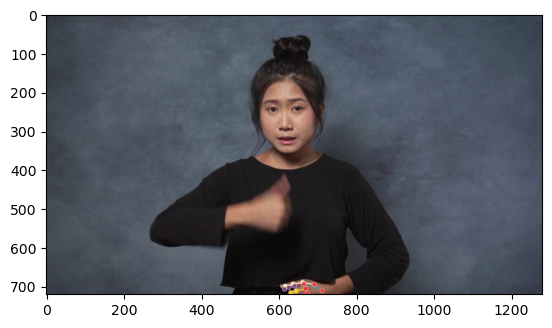

In [63]:
sign = 1
chosen_sign = signlist[sign].split(".")[0]
frame = 29
print(chosen_sign, frame)
left_file_name = graph_dir + "Left_" + chosen_sign + "_" + "{0:0>6}".format(frame) + ".json"
right_file_name = graph_dir + "Right_" + chosen_sign + "_" + "{0:0>6}".format(frame) + ".json"

image_name = os.path.join(rend_pic_dir, "Cynthia_full/", chosen_sign, chosen_sign + "_" + "{0:0>6}".format(frame) + ".jpg") 

with open(left_file_name, 'r') as file:
    data = json.load(file)
    print("Left")
    print(data)

with open(right_file_name, 'r') as file:
    data = json.load(file)
    print("Right")
    print(data)

image = mpimg.imread(image_name)
plt.imshow(image)
plt.show()

In [10]:
data

{'features': {'0': [0, 0, 0],
  '1': [0, 0, 0],
  '2': [0, 0, 0],
  '3': [0, 0, 0],
  '4': [0, 0, 0],
  '5': [0, 0, 0],
  '6': [0, 0, 0],
  '7': [0, 0, 0],
  '8': [0, 0, 0],
  '9': [0, 0, 0],
  '10': [0, 0, 0],
  '11': [0, 0, 0],
  '12': [0, 0, 0],
  '13': [0, 0, 0],
  '14': [0, 0, 0],
  '15': [0, 0, 0],
  '16': [0, 0, 0],
  '17': [0, 0, 0],
  '18': [0, 0, 0],
  '19': [0, 0, 0],
  '20': [0, 0, 0]},
 'flag': 0}